<a href="https://colab.research.google.com/github/Terry-Migwi/Moringa_Data_Science_Core_W2_Independent_Project_2020_06_Terry_Migwi_Colab_Notebook/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2020_06_Terry_Migwi_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes

1. UNIVARIATE ANALYSIS

####1. Defining the Question

###a) Specifying the Data Analytic Question

Which country has the highest number of individuals who are 40 years and below with/use a bank account? 

###b) Define the Metric for Success



a) Rank the countries in order of the one with the highest number of individuals who have bank accounts

b) Create a list of individuals who are 40 years and below in this country

c) Observe the age, gender and level of education for these individuals

###c) Understanding the Context

Financial inclusion is an essential contributor to long term economic growth. One strong indicator of financial inclusion is access to a bank account. This means that the more individuals who have access to a bank account in a country, the more promising it is to the economic growth of this country. For this reason, I would like to find out which country in East Africa has higher chances of growing its economy as a result of financial inclusion and what are some of the key features that influence financial inclusion.   

###d) Recording the Experimental Design


###e) Data Relevance

The data at hand is a sample of individuals from some countries in East Africa i.e Kenya, Rwanda, Tanzania and Uganda and their status on access to a bank account along with some key demographic factors that might drive the individual's financial outcome. The data seems to be adequate for my research question. 

##2) Reading the Data

In [ ]:
#importing libraries that will be useful for our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

In [ ]:
#loading the dataset 
#url =  http://bit.ly/FinancialDataset
financialdata_df = pd.read_csv("/content/Financial Dataset - 1.csv")

##3) Checking the data

In [ ]:
#checking the number of records in our data
financialdata_df.shape

(23524, 13)

In [ ]:
#previewing the head
financialdata_df.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [ ]:
#previewing the tail
financialdata_df.tail(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#checking whether each column has an appropriate data type
financialdata_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

##4) External DataSource Validation

In [ ]:
financialdata_df1['respondent_age'].min()

16.0

According to the World bank Africa, the age of individuals with access to a formal financial institution account is 15+. From our data, the minimum age of the respondents is 16 hence can accept our data as valid.

##5)Tidying the Datasource 

In [ ]:
#fixing messy column names
financialdata_df.columns = financialdata_df.columns.str.lower().str.replace(' ','_')
financialdata_df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [ ]:
#correcting misspelt column names
financialdata_df = financialdata_df.rename(columns = {'the_relathip_with_head':'the_relationship_with_head','level_of_educuation':'level_of_education'})
financialdata_df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [ ]:
#checking if there is missing data
financialdata_df.isnull().values.any()

True

In [ ]:
#checking how many missing values we have to determine how to deal with it
financialdata_df.isnull().values.sum()

267

In [ ]:
#dropping missing values 
financialdata_df1 = financialdata_df.dropna()
#dropped entire rows if one value of the row is missing 
#because the dataset mostly contained categorical data which I did not want to replace

In [ ]:
#confirming missing values were dropped

financialdata_df1.shape

(23343, 13)

In [ ]:
#checking for duplicate values

financialdata_df1[financialdata_df1.duplicated()]
#there are no duplicates in our data

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job


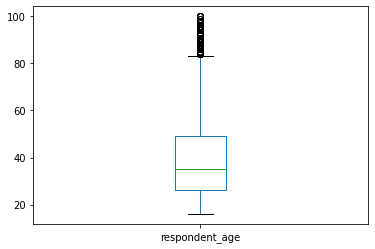

In [ ]:
#checking for outliers in the age column
financialdata_df1.boxplot(['respondent_age'], grid = False)

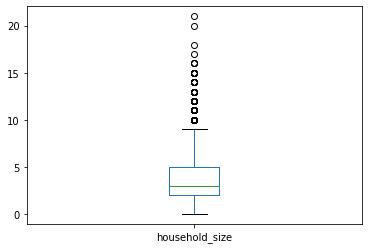

In [ ]:
#checking for outliers in size of household
financialdata_df1.boxplot(['household_size'], grid = False)

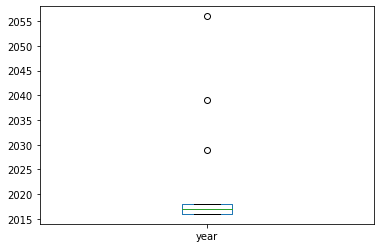

In [ ]:
#checking for outliers in year
financialdata_df1.boxplot(['year'], grid = False)

In [ ]:
#checking for anomalies
#outliers in age column
q1_age = financialdata_df1['respondent_age'].quantile(.25)
q3_age = financialdata_df1['respondent_age'].quantile(.75)
iqr_age = q3_age - q1_age

#outliers in household size column
q1_h_size = financialdata_df1['household_size'].quantile(.25)
q3_h_size = financialdata_df1['household_size'].quantile(.75)
iqr_h_size = q3_h_size - q1_h_size


#outliers in household size column
q1_year = financialdata_df1['year'].quantile(.25)
q3_year = financialdata_df1['year'].quantile(.75)
iqr_year = q3_year - q1_year
print(iqr_age,iqr_h_size)

# the variables age, household_size and year have 23, 3, and 2 entries that are not within the upper and lower bounds respectively.

23.0 3.0


In [ ]:
#drop the column year
financialdata_df1.drop(['year'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#performing statistics on our data

financialdata_df1.describe()
#the numerical variables (household_size and respondent_age have means of 3.6 and 38.9 respectively)
#and standard deviations of 2.28 and 16.51 respectively. The two don't show such a great variation around the mean

,household_size,respondent_age
count,23343.000000,23343.000000
mean,3.688643,38.805509
std,2.281184,16.519803
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [ ]:
#describing the entire dataset
financialdata_df1.describe(include = "all")

,country,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
count,23343,23343,23343,23343,23343,23343.000000,23343.000000,23343,23343,23343,23343,23343
unique,4,8687,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,uniqueid_1623,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8684,4,20046,14264,17334,NaN,NaN,13767,12730,10700,12689,6361
mean,NaN,NaN,NaN,NaN,NaN,3.688643,38.805509,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2.281184,16.519803,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
#more information from our cleaned dataset
financialdata_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     23343 non-null  object 
 1   uniqueid                    23343 non-null  object 
 2   has_a_bank_account          23343 non-null  object 
 3   type_of_location            23343 non-null  object 
 4   cell_phone_access           23343 non-null  object 
 5   household_size              23343 non-null  float64
 6   respondent_age              23343 non-null  float64
 7   gender_of_respondent        23343 non-null  object 
 8   the_relationship_with_head  23343 non-null  object 
 9   marital_status              23343 non-null  object 
 10  level_of_education          23343 non-null  object 
 11  type_of_job                 23343 non-null  object 
dtypes: float64(2), object(10)
memory usage: 2.3+ MB


##6.Exploratory Analysis

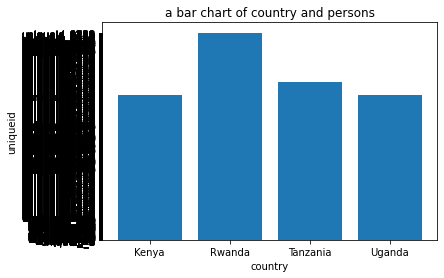

In [ ]:
#plotting the univariate summaries and recording our observations

#assigning variables
country = financialdata_df1['country']
individuals = financialdata_df1['uniqueid']
#plotting the bar
plt.bar(country,individuals)
plt.ylabel('uniqueid')
plt.xlabel('country')
plt.title('a bar chart of country and persons')
plt.show()
#Rwanda has the most number of people as per the survey

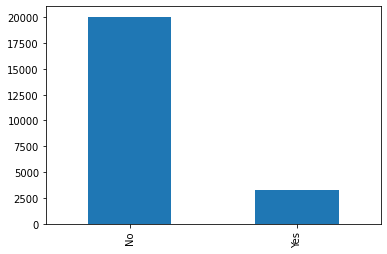

In [ ]:
#a bar graph of the number of people with and without bank accounts
financialdata_df1['has_a_bank_account'].value_counts().plot.bar()
#the number of people withuot bank accounts is significantly higher

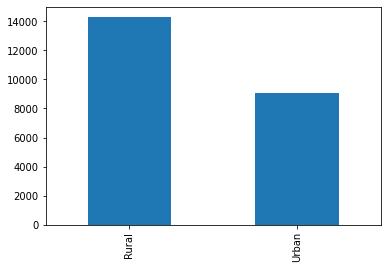

In [ ]:
#type of location where most people live
financialdata_df1['type_of_location'].value_counts().plot.bar()

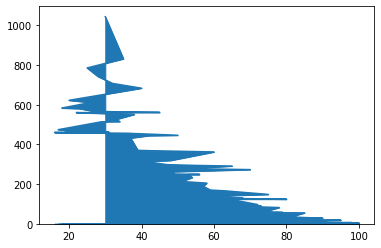

In [ ]:
#creating a pie chart of country by access to a bank account
financialdata_df1['respondent_age'].value_counts().plot.area()

In [ ]:
#grouping age
grouped_age_by_bank_account = financialdata_df1.groupby('has_a_bank_account')['respondent_age'].sum()
grouped_age_by_bank_account

has_a_bank_account
No     776013.0
Yes    130635.0
Name: respondent_age, dtype: float64

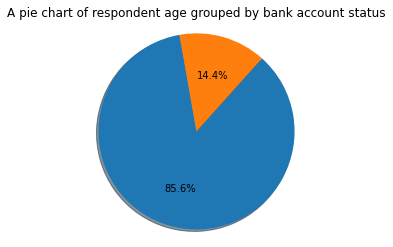

In [ ]:
#plotting a pie chart of all countries 
#assigning variables
grouped_age_by_bank_account = financialdata_df1.groupby('has_a_bank_account')['respondent_age'].sum()
labels = financialdata_df1.groupby('has_a_bank_account')
#exploding the second variable
#explode = (0, 0.1, 0)

#creating a pie chart of individuals with a bank account by age
plt.pie(grouped_age_by_bank_account, autopct = '%1.1f%%', shadow = True, startangle = 100)
plt.axis('equal')
plt.title('A pie chart of respondent age grouped by bank account status')
plt.show()

##Implementing the solution

In [ ]:
#ranking coutries by descending number of people with and without bank accounts
financialdata_df1.groupby(['country','has_a_bank_account'])['has_a_bank_account'].count().sort_values(ascending = False)


country   has_a_bank_account
Rwanda    No                    7687
Tanzania  No                    5901
Kenya     No                    4544
Uganda    No                    1914
Kenya     Yes                   1520
Rwanda    Yes                    997
Tanzania  Yes                    599
Uganda    Yes                    181
Name: has_a_bank_account, dtype: int64

In [ ]:
#ranking countries, the number of people with a bank account, their level of education and type of location the live in by their age

#bank_account_filter = financialdata_df1[financialdata_df1.has_a_bank_account == 0]
financialdata_df1[financialdata_df1.respondent_age < 40].groupby(['country','has_a_bank_account', 'level_of_education', 'type_of_location','respondent_age'])['respondent_age'].mean().sort_values(ascending = False)

    

country   has_a_bank_account  level_of_education               type_of_location  respondent_age
Uganda    Yes                 Vocational/Specialised training  Urban             39.0              39.0
Kenya     Yes                 Primary education                Urban             39.0              39.0
Tanzania  No                  Vocational/Specialised training  Rural             39.0              39.0
Rwanda    No                  Primary education                Urban             39.0              39.0
Uganda    No                  Secondary education              Urban             39.0              39.0
                                                                                                   ... 
Rwanda    No                  Primary education                Rural             16.0              16.0
                              No formal education              Urban             16.0              16.0
Uganda    No                  Secondary education              Rural    

## Challenging the solution

Our solution shows that Uganda has the most number of people who are 40 years and below with access to a bank account. Also, these people live in the urban areas and have gone through vocational/specialized training. This solution has been derived by computing the mean age of these individuals.

However, it is possible that Kenya, which is following Uganda closely has more number of people under 40 who have bank accounts, however, the mean af their ages has more variability hence the difference in results?

##Follow up Questions

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth

###Did we have the right data

Following the analysis, we yes we did have the right data to conduct adequate analysis

###Do we need other data to answer our questions

As far as this analysis goes, the data provided was adequate. However, the anaylysis would have been more reliable had the data been uniform in terms of years

###Did we have the right question?

The question at hand summarizes the factors/characteristics exhibited by individuals who have/use bank accounts hence a good place to start predicting which individuals are more likely to have bank accounts

##BIVARIATE ANALYSIS

##1.Defining the Question

##a) Specifying the Data Analytic Question

How do the factors mentioned below relate with having a bank account? 


*   Age
*   Level of education
*   Type of location
*   Access to cell phone
*   Gender







##b) Defining the Metric for Success

1. Calculate the correlation coefficient between the variables
2. Find the correlation matrix
3. Scatter plots of the variables

---



##c) Understanding the context




Financial inclusion is an essential contributor to long term economic growth. One strong indicator of financial inclusion is access to a bank account. This means that the more individuals who have access to a bank account in a country, the more promising it is to the economic growth of this country. For this reason, I would like to find out some of the key features/factors that influence to financial inclusion and how they are they relate to each other


##d) Recording the Experimental Design

##e) Data Relevance

The data at hand has all the necessary information required to conduct my analysis

## Reading our data



In [ ]:
#previewing our data
financialdata_df1.head(3)

,country,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


## Tidying our data

In [ ]:
#dropping unecessary columns
financialdata_df1.drop(['country','uniqueid','the_relationship_with_head','marital_status','type_of_job'],axis = 1, inplace = True)
financialdata_df1.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,level_of_education
0,Yes,Rural,Yes,3.0,24.0,Female,Secondary education
1,No,Rural,No,5.0,70.0,Female,No formal education
2,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training
3,No,Rural,Yes,5.0,34.0,Female,Primary education
4,No,Urban,No,8.0,26.0,Male,Primary education


In [ ]:
#encoding necessary categorical variables to be able to view correlation
encode = {"has_a_bank_account": {"Yes":1, "No":0}, "type_of_location": {"Rural":1, "Urban":0},
          "gender_of_respondent": {"Male":1, "Female":0},"cell_phone_access":{"Yes":1,"No":0},
          "level_of_education":{"No formal education":0,"Primary education":1, "Secondary education":2,
                                "Vocational/Specialised training":3,"Tertiary education":4, "Other/Dont know/RTA":5}}

In [ ]:
#
financialdata_df1.replace(encode, inplace = True)
financialdata_df1.head(2)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,level_of_education
0,1,1,1,3.0,24.0,0,2
1,0,1,0,5.0,70.0,0,0


In [ ]:
#information about our dataset
financialdata_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   has_a_bank_account    23343 non-null  int64  
 1   type_of_location      23343 non-null  int64  
 2   cell_phone_access     23343 non-null  int64  
 3   household_size        23343 non-null  float64
 4   respondent_age        23343 non-null  float64
 5   gender_of_respondent  23343 non-null  int64  
 6   level_of_education    23343 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 1.4+ MB


In [ ]:
#converting level of education to float data type
financialdata_df1['level_of_education'] = financialdata_df1['level_of_education'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##6.Exploratory Analysis

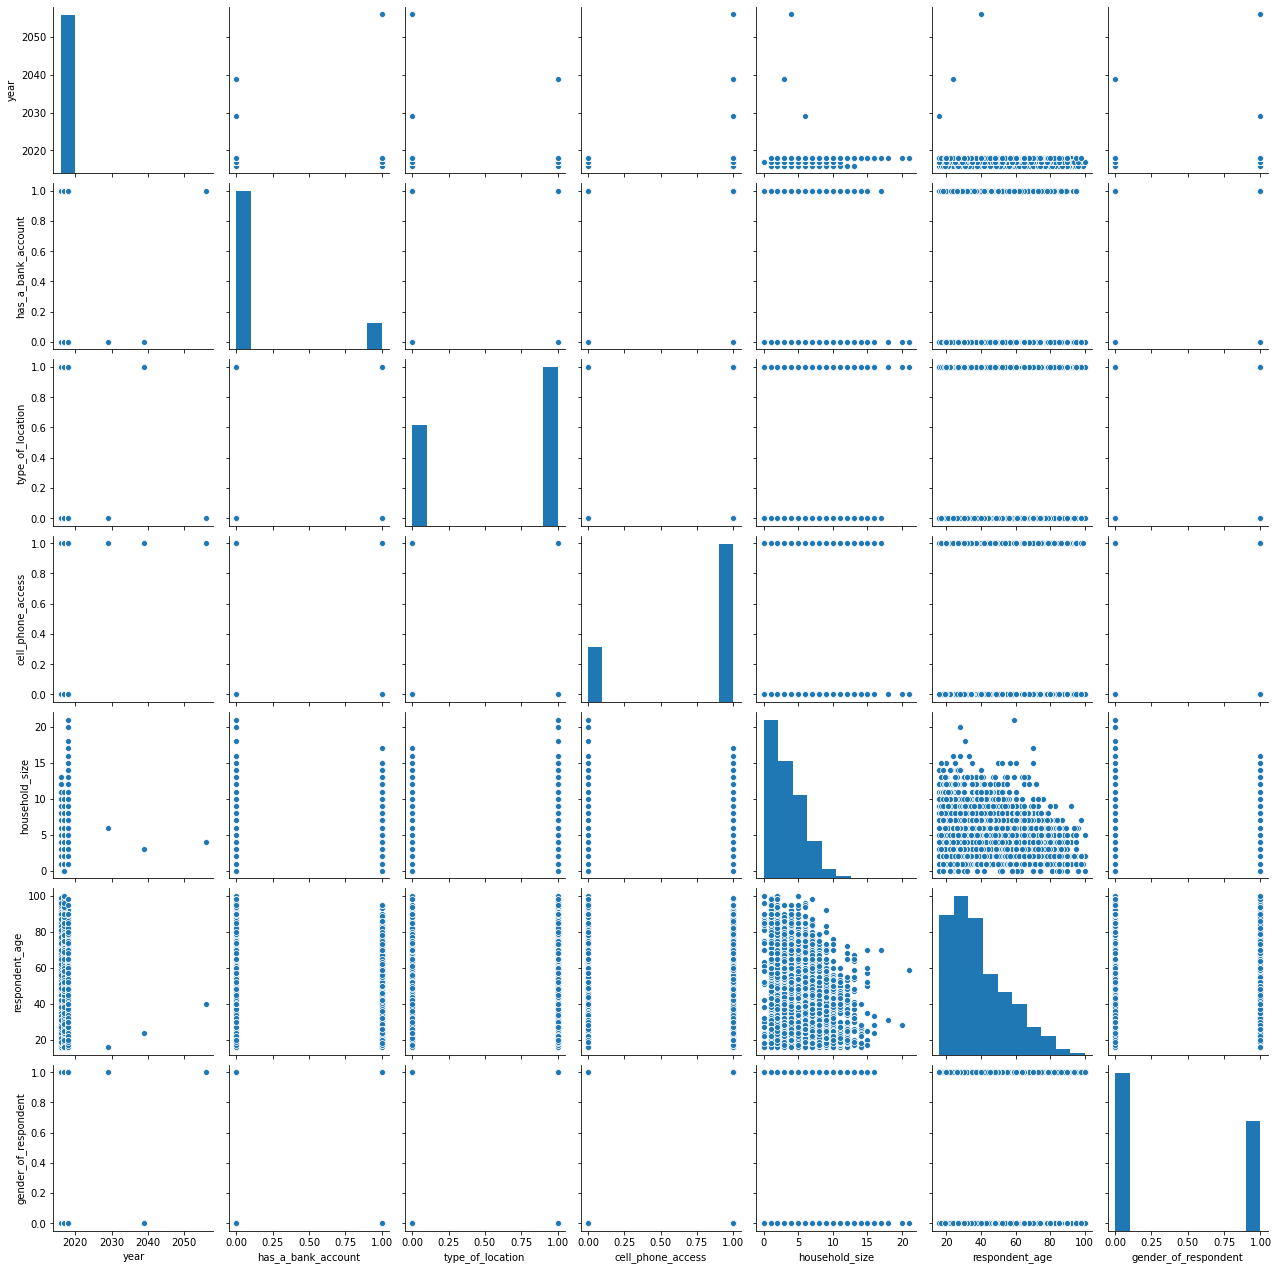

In [ ]:
#plotting the bivariate summaries and recording our observations
sns.pairplot(financialdata_df1)
plt.show()

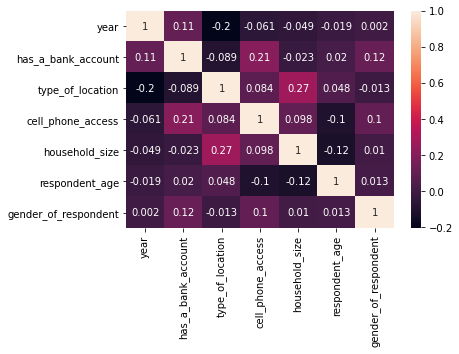

In [ ]:
#correlation between the different variables
sns.heatmap(financialdata_df1.corr(),annot=True)
plt.show()

##Implementing the Solution

In [ ]:
#correlation coefficient between the two variables

#correlation coefficient between education level and having a bank account

financialdata_df1['level_of_education'].corr(financialdata_df1['has_a_bank_account'])
#the level of education of an individual has a weak positive correlation to having a bank account. 

0.3601687487676543

In [ ]:
#correlation coefficient of type of location of an individual and having a bank account
financialdata_df1['type_of_location'].corr(financialdata_df1['has_a_bank_account'])
#the two variables have a weak negative correlation

-0.088731371231783

In [ ]:
#correlation coefficient of gender of an individual and having a bank account
financialdata_df1['gender_of_respondent'].corr(financialdata_df1['has_a_bank_account'])
#the two variables have a weak positive correlation

0.11615307466742542

In [ ]:
#correlation coefficient of type of location of an individual and having a bank account
financialdata_df1['respondent_age'].corr(financialdata_df1['has_a_bank_account'])
#the two variables have a weak positive correlation

0.01964467227121254

In [ ]:
education_level = financialdata_df1[financialdata_df1.has_a_bank_account == 1].groupby('has_a_bank_account')['has_a_bank_account'].count().sort_values(ascending = False)
education_level

has_a_bank_account
1    3297
Name: has_a_bank_account, dtype: int64

In [ ]:
level_of_education = financialdata_df1['level_of_education']

In [ ]:
#assigning our variables
access_to_bank_account= financialdata_df1['has_a_bank_account']
level_of_education = financialdata_df1['level_of_education']
age = financialdata_df1['respondent_age']

Text(0, 0.5, 'bank account')

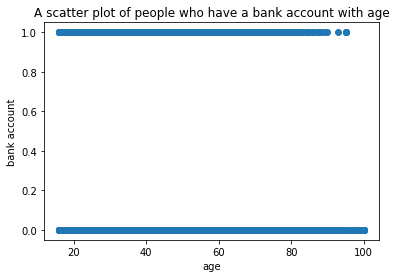

In [ ]:
#plotting scatter plot
plt.scatter(age,access_to_bank_account)
plt.title('A scatter plot of people who have a bank account with age')
plt.xlabel('age')
plt.ylabel('bank account')

## Challenging the Solution

From the Analysis, we find that the demographic factors of an individual have a weak correlation to the using/ having a bank account. This is contrary to popular belief hence need for further investigation 

## Follow up questions

###a) Did we have the right data?

The data at hand was mostly categorical data which needed to be encoded into numerical data to allow for analysis. This process might not have been the most effective hence we would require better quality of data to be confident about our results

###b) Do we need other data to answer our question?


```
# This is formatted as code
```



From the results obtained, we do need a more defined dataset to be able to conduct this analysis

###c) Did we have the right question?

The question about the relationship of the variables is right as it guides us on building a prediction model

##MULTIVARIATE ANALYSIS

##1. Defining the Question

###a) Specifying the data analytic question

Given the financial dataset of a sample of individuals from different countries in East Africa, Predict which individuals are more likely to use/ have a bank account

###b) Define the Metric for success

A prediction model with at least 80 percent accuracy

###c) Understanding the context

Financial inclusion is a metric of economic growth in a country. Access to a bank account is one indicator of financial inclusion. A model to predict which individuals are more likely to use/ have a bank account is important so as to make important decisions that will affect the economic growth of the country through financial inclusion

###d) Recording the experimental design

###e) Data Relevance

The data at hand is relevant for this analysis as it captures some key demographics about individuals who already have access to a bank account and the individuals who do not have a bank account yet. Hence, it will be possible to build a prediction model with this data

##Exploratory Analysis

###Reduction model using Principle component analysis

In [ ]:
#previewing our data
financialdata_df1.head()

,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,level_of_education
0,1,1,1,3.0,24.0,0,2
1,0,1,0,5.0,70.0,0,0
2,1,0,1,5.0,26.0,1,3
3,0,1,1,5.0,34.0,0,1
4,0,0,0,8.0,26.0,1,1


In [ ]:
# pre-processing step: divide the dataset into a feature set and corresponding labels. 
X = financialdata_df1.drop('has_a_bank_account', 1)
y = financialdata_df1['has_a_bank_account']

In [ ]:
#calling the feature set
X

,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,level_of_education
0,1,1,3.0,24.0,0,2
1,1,0,5.0,70.0,0,0
2,0,1,5.0,26.0,1,3
3,1,1,5.0,34.0,0,1
4,0,0,8.0,26.0,1,1
...,...,...,...,...,...,...
23519,1,1,4.0,48.0,0,0
23520,1,1,2.0,27.0,0,2
23521,1,1,5.0,27.0,0,1
23522,0,1,7.0,30.0,0,2


In [ ]:
#pre-processing step: convert feature set into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#perform standard scalar normalization to normalize our feature set
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#applying PCA without specifying the number of components
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.24679324, 0.22091321, 0.17259471, 0.14207623, 0.11388131,
       0.1037413 ])

In [ ]:
#Using one principle component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [ ]:
#Training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

#making predictions
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))
#our model indicates 0.85 accuaracy using one pca hence we are 85% confident that our model is correct

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


In [ ]:
#using two principle components

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))
#using two pca, the accuracy of our model barely changes 

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


In [ ]:
#using three principle components
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


##Implementing the Solution

In [ ]:
y_pred

###Challenging the Solution

The prediction model is 85% accurate using one, two and three components. However, probably using a different technique would increase the level of accuracy

###Follow up questions

####a)Did we have the right data?

The data was sufficient to make an analysis, however, we had to encode most of the most important variables for this analysis into o's and 1's. This process might not have been the most efficient to conduct this analysis.

####b)Do we need other data to answer our question?

The data we had was enough but it would better had the data actually been captured in the correct format to use

####c)Did we have the right question?

The question was good to conduct an appropriate analysis of financial inclusion